In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/ckdisease/kidney_disease.csv


## Notebook Link

https://www.kaggle.com/code/aliessamali/chronic-kidney-disease-prediction

# Exploring

In [3]:
df=pd.read_csv("../input/ckdisease/kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.shape

(400, 26)

In [5]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [6]:
# dropping id column
df.drop('id', axis = 1, inplace = True)

In [7]:
# rename column names to make it more user-friendly
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [8]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [9]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [11]:
# Printing unique values in data
for i in df.columns:
    print('unique values in "{}":\n'.format(i),df[i].unique())

unique values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in "blood_pressure":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in "specific_gravity":
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in "albumin":
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in "sugar":
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in "red_blood_cells":
 [nan 'normal' 'abnormal']
unique values in "pus_cell":
 ['normal' 'abnormal' nan]
unique values in "pus_cell_clumps":
 ['notpresent' 'present' nan]
unique values in "bacteria":
 ['notpresent' 'present' nan]
unique values in "blood_glucose_random":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114

The data has lots of typos

# Preprocessing

## Fixing typos

In [12]:
# replace some incorrect values
df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [13]:
# converting necessary columns to numerical type
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [14]:
df['class'] = df['class'].map({'not ckd': 0, 'ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [15]:
# Extracting categorical and numerical columns
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [16]:
df.head(10)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,1
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,...,39.0,7800.0,4.4,yes,yes,no,good,yes,no,1
6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,...,36.0,NaN,NaN,no,no,no,good,no,no,1
7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,...,44.0,6900.0,5.0,no,yes,no,good,yes,no,1
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,...,33.0,9600.0,4.0,yes,yes,no,good,no,yes,1
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

## Fixing Missing Values

In [18]:
# checking for null values
df.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [19]:
df[num_cols].isnull().sum().sort_values(ascending = False)

red_blood_cell_count      131
white_blood_cell_count    106
potassium                  88
sodium                     87
packed_cell_volume         71
haemoglobin                52
sugar                      49
specific_gravity           47
albumin                    46
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
blood_pressure             12
age                         9
class                       0
dtype: int64

In [20]:
df[cat_cols].isnull().sum().sort_values(ascending = False)

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
dtype: int64

In [21]:
# filling null values, we will use two methods, random sampling for higher null values and mean/mode sampling for lower null values
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [22]:
# filling num_cols null values using random sampling method
for col in num_cols:
    random_value_imputation(col)
    
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
class                     0
dtype: int64

In [23]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation
random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)
    
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
dtype: int64

## Feature Encoding

In [24]:
# Printing unique values in cat_cols
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories



In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

We used a label encoder to transform the categorical data to numerical data

In [26]:
df.head(10)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,100.0,...,38.0,6000.0,5.5,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,3.9,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,1
5,60.0,90.0,1.015,3.0,0.0,1,0,0,0,74.0,...,39.0,7800.0,4.4,1,1,0,0,1,0,1
6,68.0,70.0,1.010,0.0,0.0,1,1,0,0,100.0,...,36.0,21600.0,5.8,0,0,0,0,0,0,1
7,24.0,50.0,1.015,2.0,4.0,1,0,0,0,410.0,...,44.0,6900.0,5.0,0,1,0,0,1,0,1
8,52.0,100.0,1.015,3.0,0.0,1,0,1,0,138.0,...,33.0,9600.0,4.0,1,1,0,0,0,1,1
9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,70.0,...,29.0,12100.0,3.7,1,1,0,1,0,1,1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          400 non-null    int64  
 6   pus_cell                 400 non-null    int64  
 7   pus_cell_clumps          400 non-null    int64  
 8   bacteria                 400 non-null    int64  
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  haemoglobin              4

# Visualizing the Data

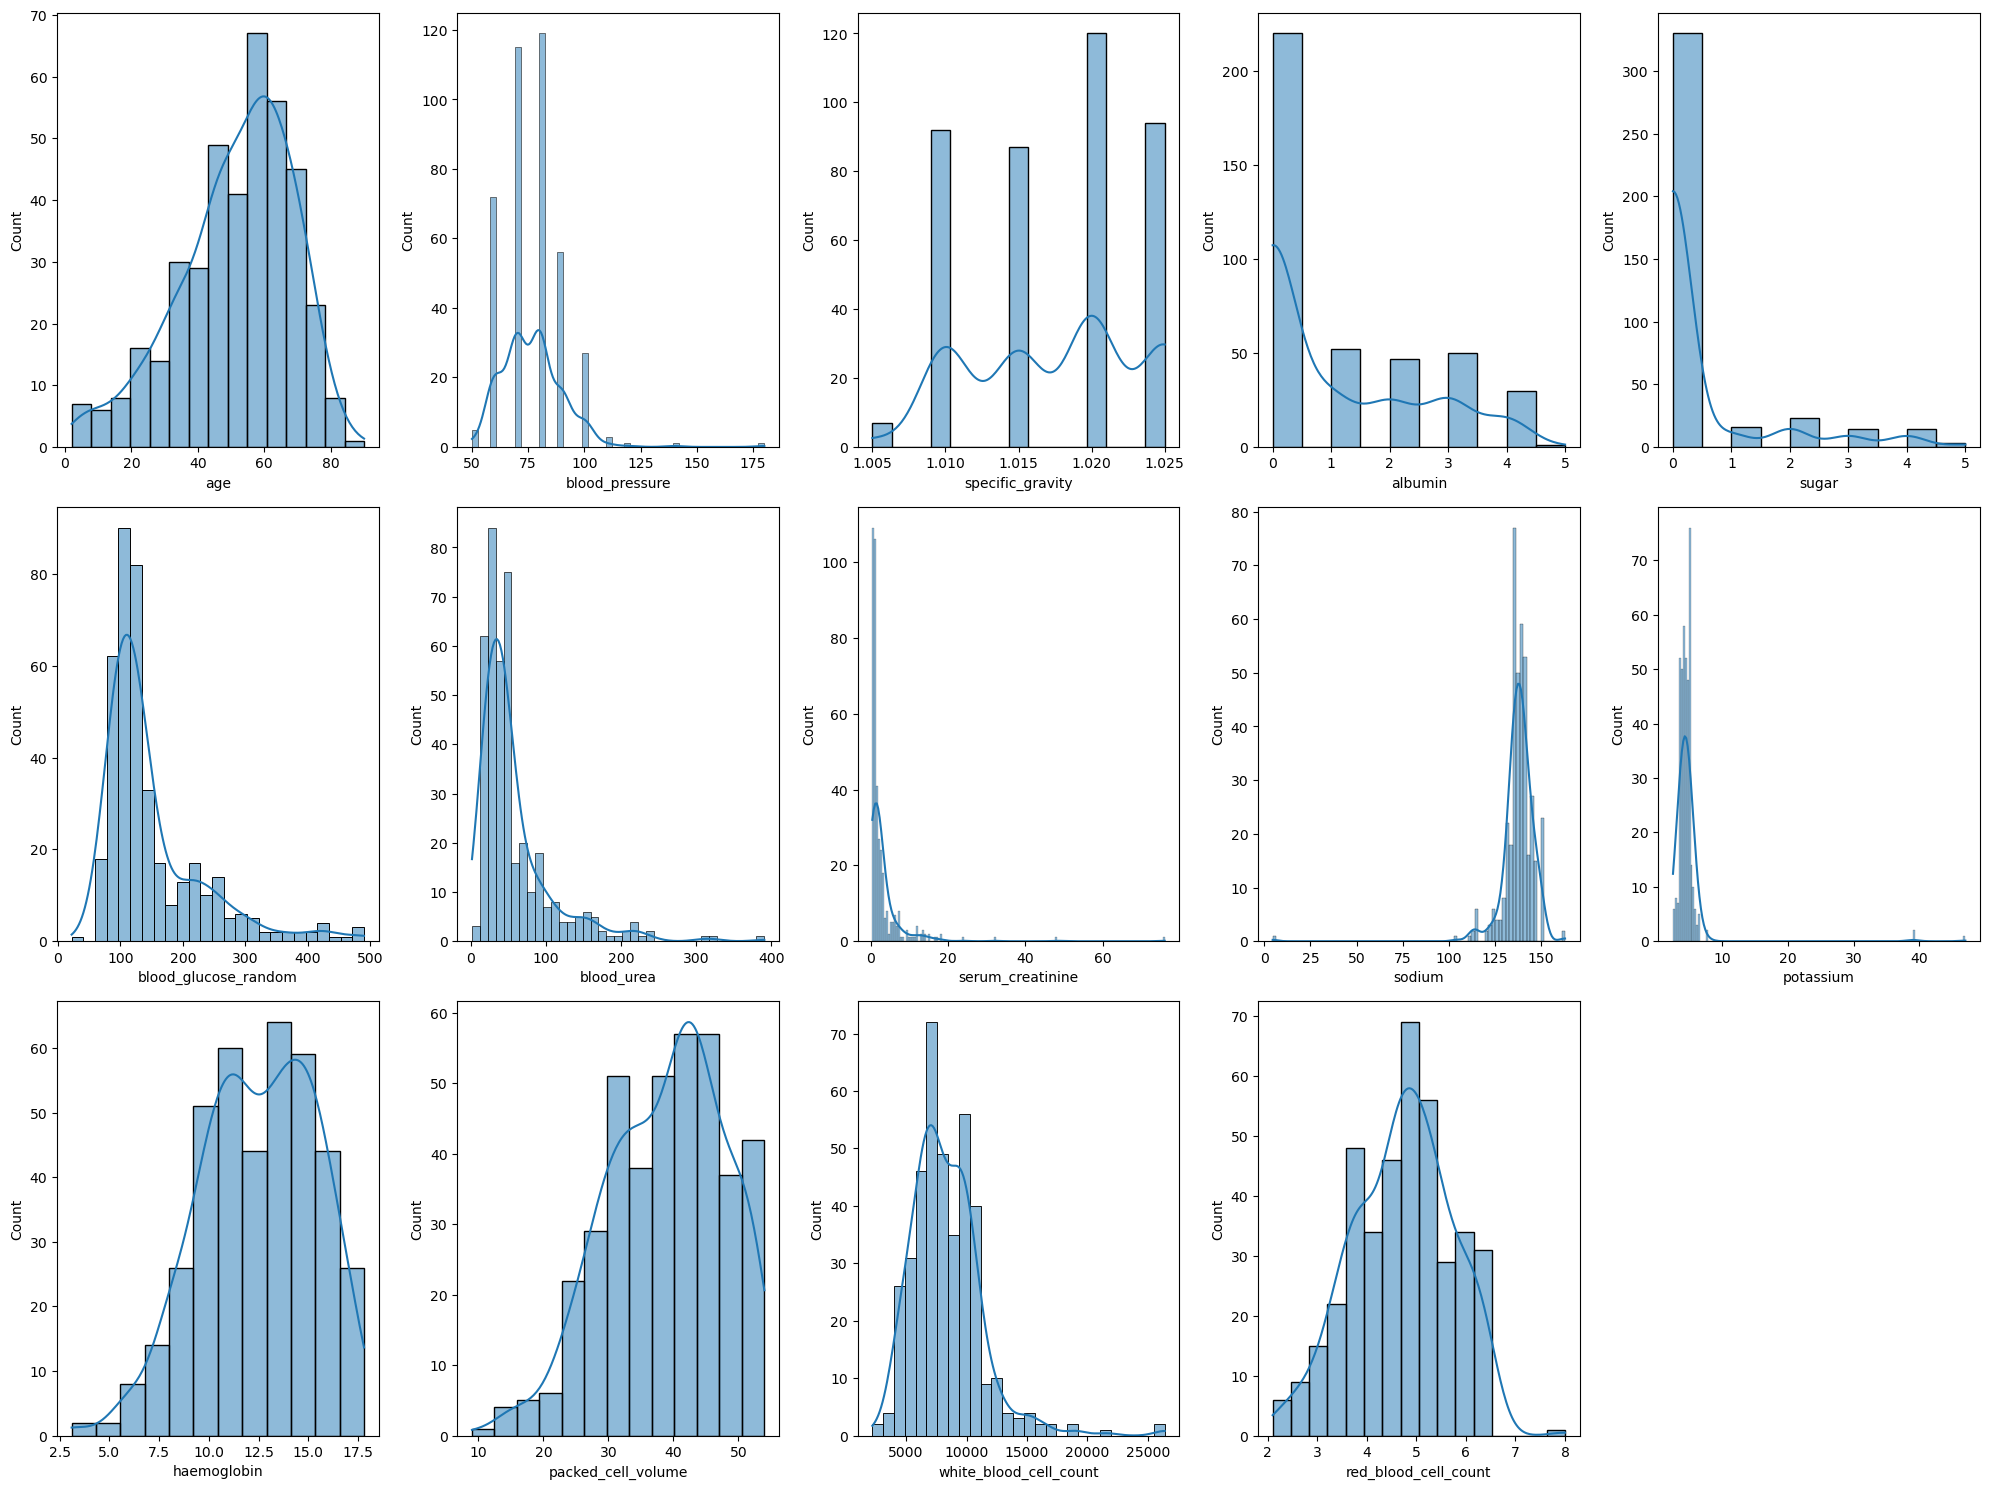

In [230]:
# checking numerical features distribution
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(df[column], kde=True)
        plt.xlabel(column)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

We can see some skewness in the data

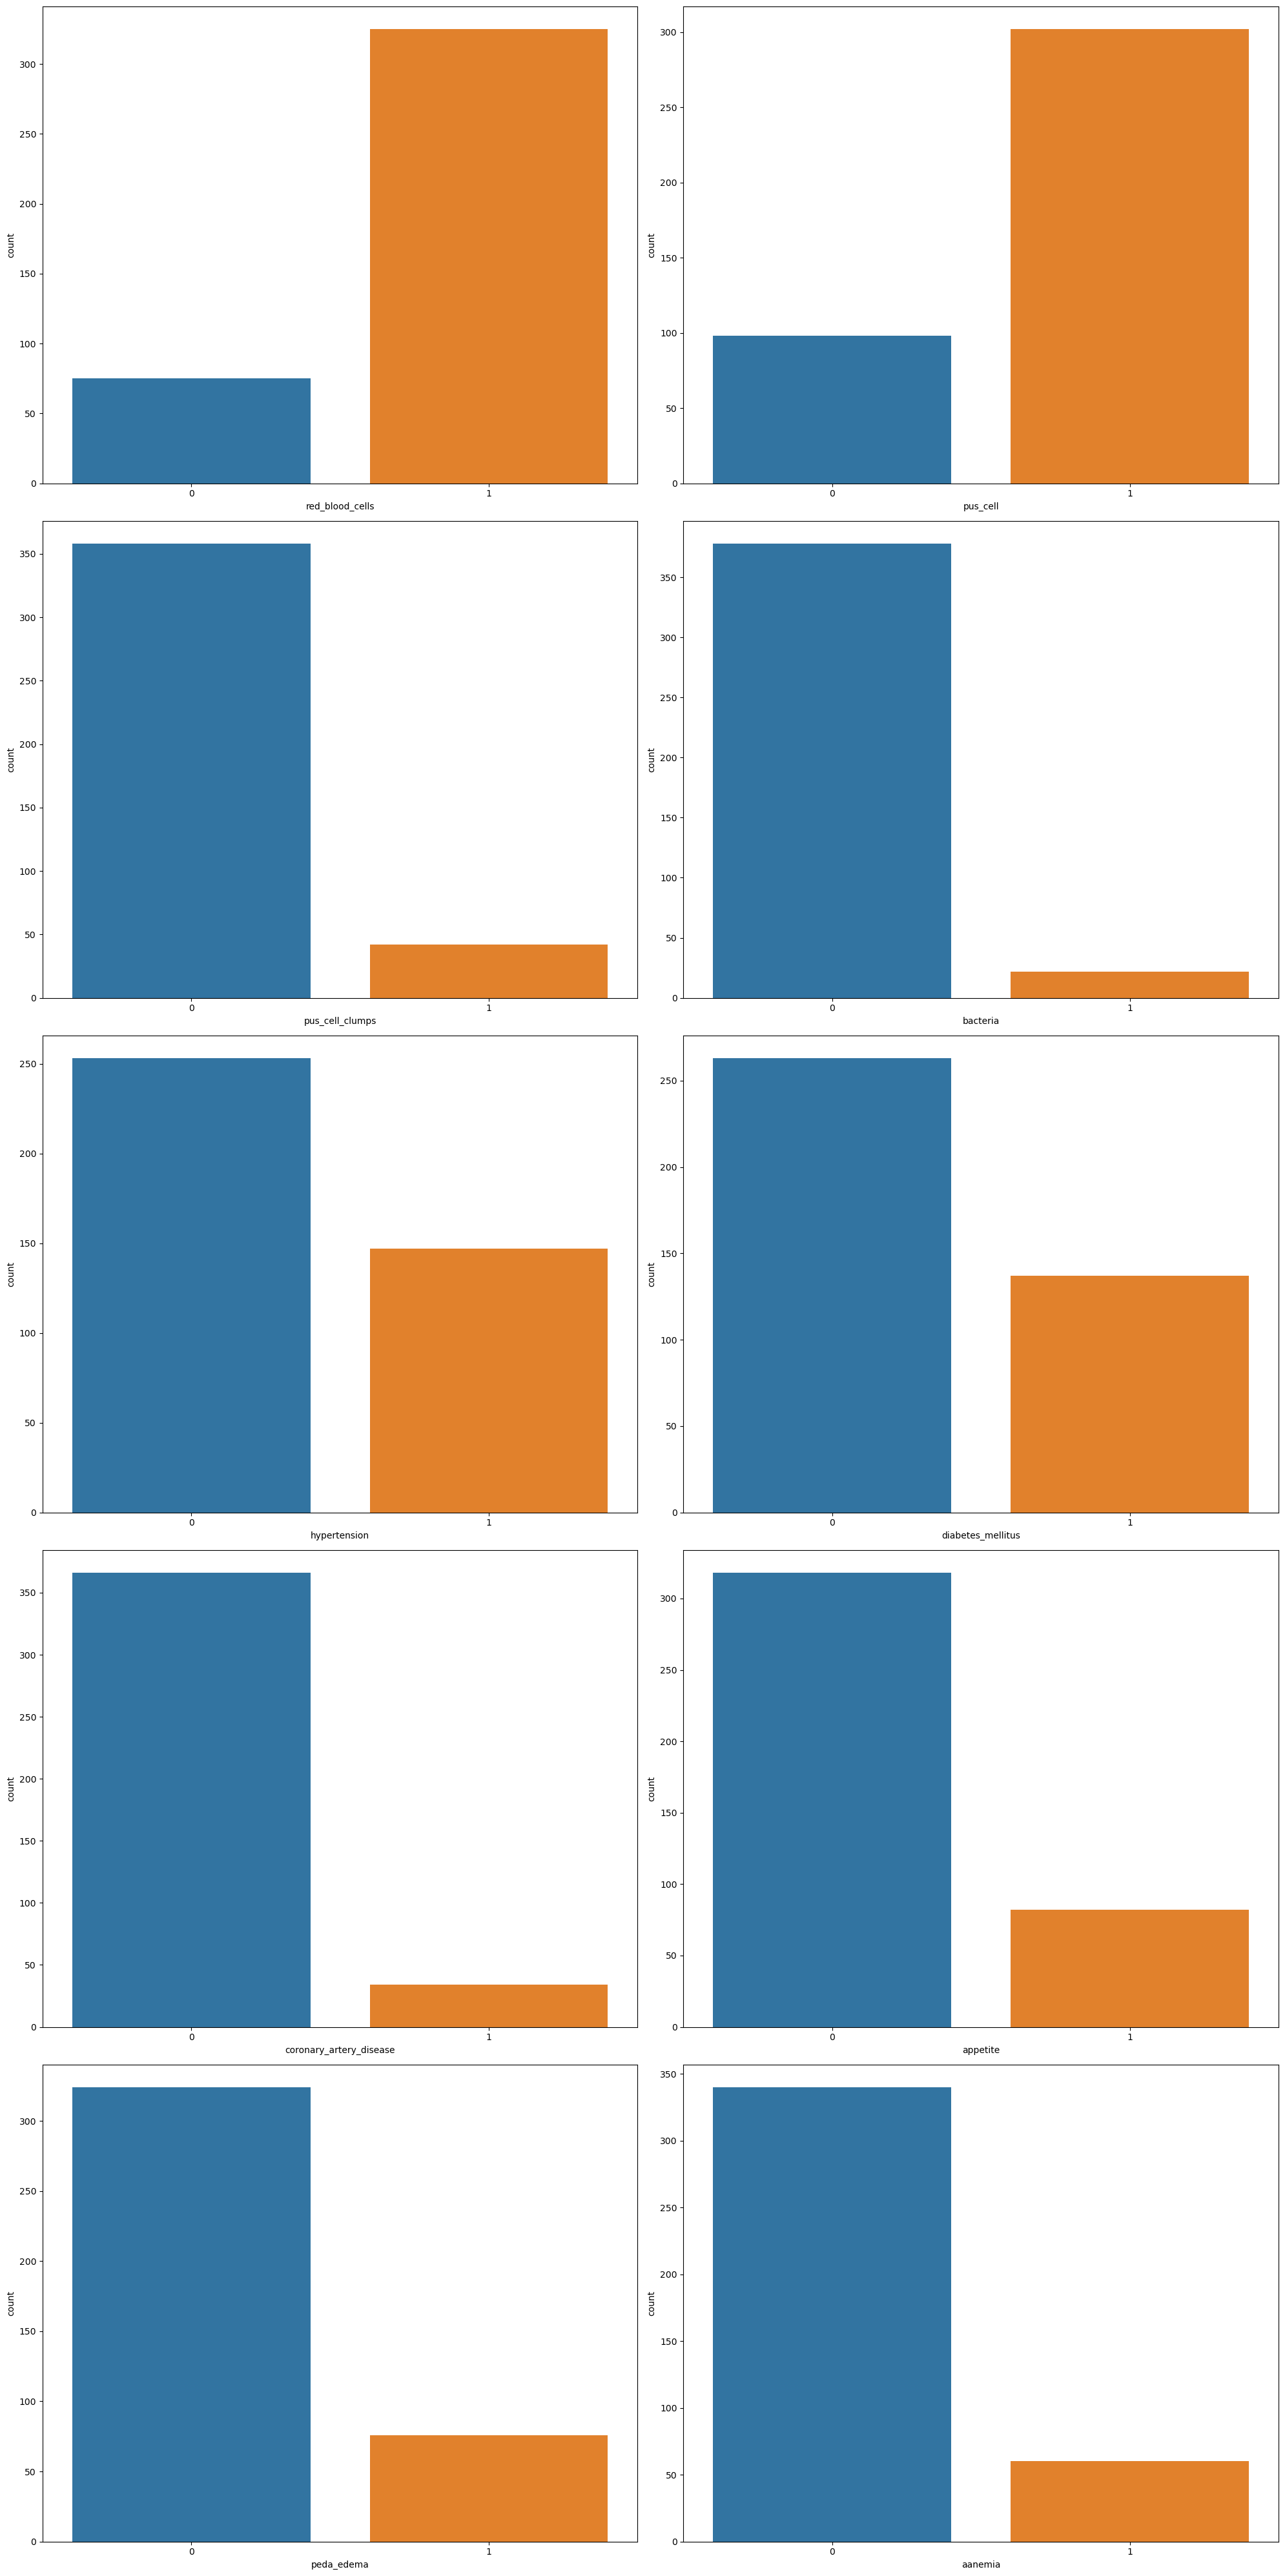

In [231]:
# Checking categorical columns
plt.figure(figsize=(20, 40))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(5, 2, plotnumber)
        sns.countplot(data=df, x=column)
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

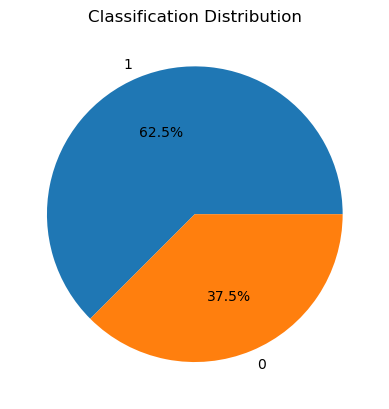

In [232]:
# Checking target class
plt.pie(df['class'].value_counts(), labels=df['class'].value_counts().index, autopct='%1.1f%%')
plt.title('Classification Distribution')
plt.show()

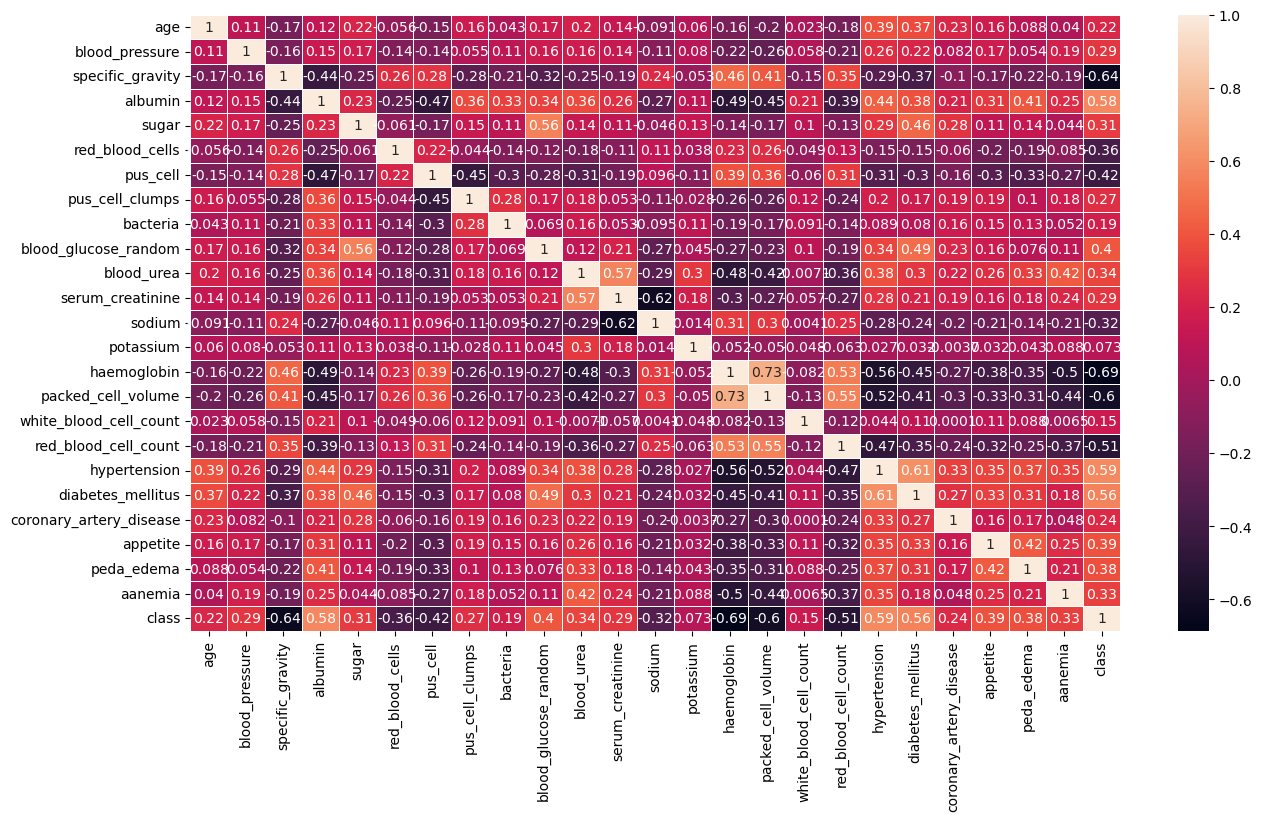

In [233]:
# heatmap of the data
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), annot = True, linewidths = 0.5)
plt.show()

In [234]:
# Calculate the correlation list
target_corr = df.corr()['class'].abs().sort_values(ascending=False)[1:]
print(target_corr)

haemoglobin                0.685961
specific_gravity           0.643466
packed_cell_volume         0.602294
hypertension               0.590438
albumin                    0.579566
diabetes_mellitus          0.559060
red_blood_cell_count       0.507069
pus_cell                   0.417237
blood_glucose_random       0.403886
appetite                   0.393341
peda_edema                 0.375154
red_blood_cells            0.358874
blood_urea                 0.342129
aanemia                    0.325396
sodium                     0.316408
sugar                      0.312410
serum_creatinine           0.294078
blood_pressure             0.292691
pus_cell_clumps            0.265313
coronary_artery_disease    0.236088
age                        0.224686
bacteria                   0.186871
white_blood_cell_count     0.150947
potassium                  0.073133
Name: class, dtype: float64


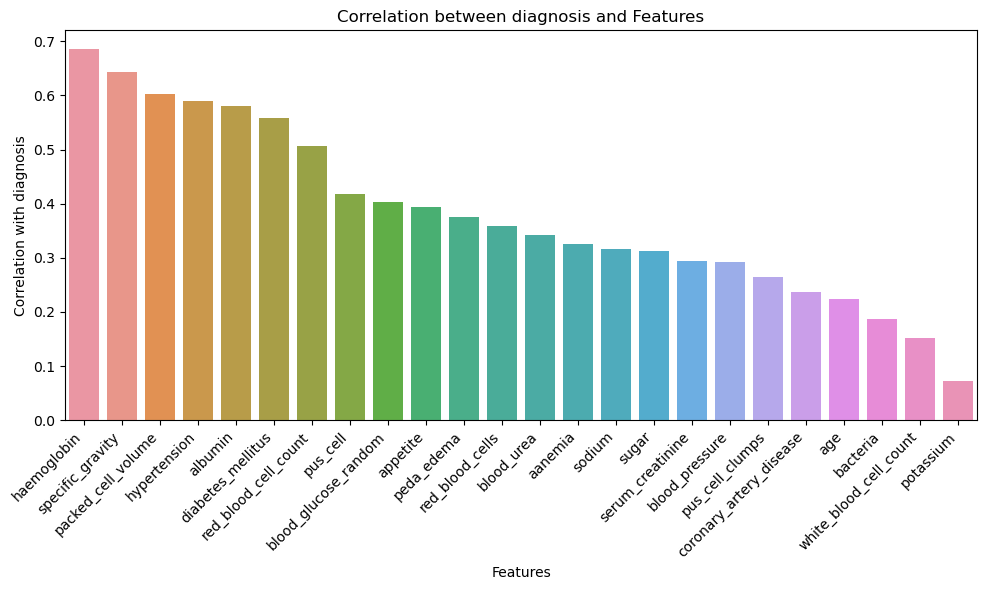

In [235]:
# Create a bar chart to visualize the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.index, y=target_corr.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Correlation with diagnosis')
plt.title('Correlation between diagnosis and Features')
plt.tight_layout()
plt.show()

We can see here which features correlate with the classification the most.

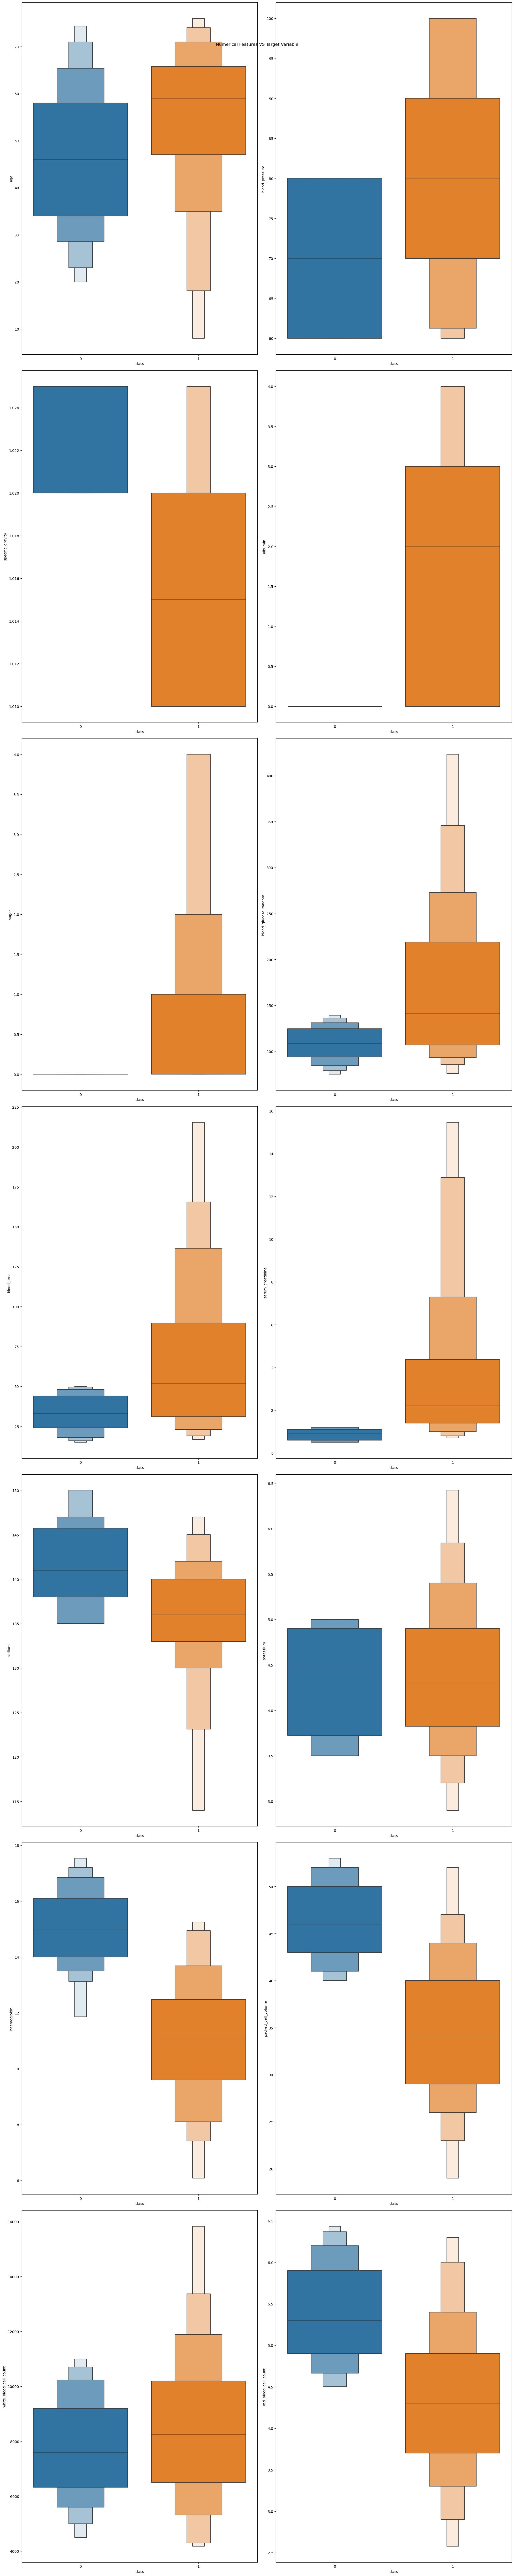

In [236]:
# Creating a boxen plot to show features against the target
n_rows, n_cols = (7,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize = (20, 100))
figure.suptitle('Numerical Features VS Target Variable')

for index, column in enumerate(num_cols[:-1]):
    
    i,j = (index // n_cols), (index % n_cols)
    bp=sns.boxenplot(y=column, x='class', data=df, ax=axes[i,j], showfliers=False)
    axes[i,j].set_xlabel(axes[i,j].get_xlabel())
    axes[i,j].set_ylabel(column)
    axes[i,j].set_xticklabels(axes[i,j].get_xticklabels())
plt.tight_layout()
plt.show()

We can see here that some values in some features play a role in being diagnosed with that disease.

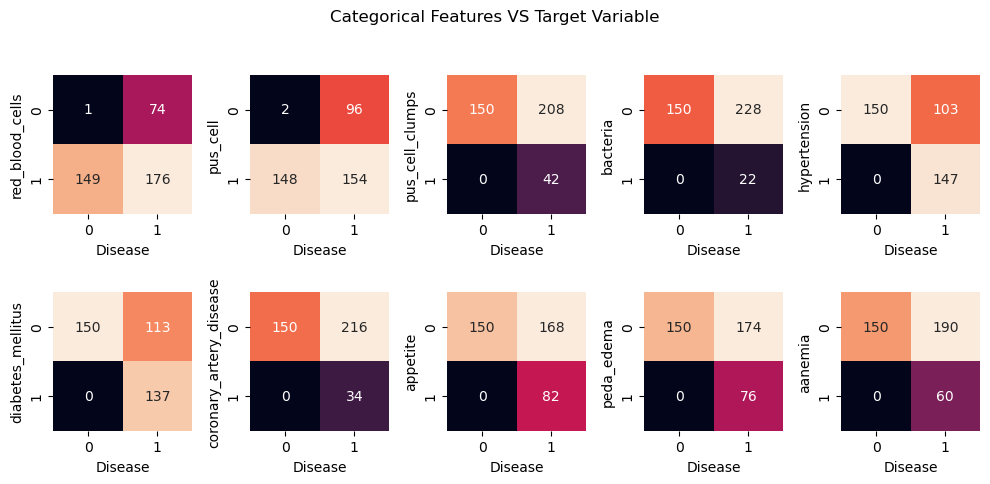

In [238]:
n_rows, n_cols = (2,5)
figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(10, 5))
figure.suptitle('Categorical Features VS Target Variable')

for index, column in enumerate(cat_cols):
    i,j = (index // n_cols), (index % n_cols)
    sns.heatmap(pd.crosstab(df[column], df['class']), ax=axes[i,j], square='True', cbar=False, annot=True, fmt='d')
        
    axes[i,j].set_xlabel("Disease")
    axes[i,j].set_ylabel(column)
    
plt.tight_layout()
plt.show()

No much correlation visible here

# Modeling

## Supervised Learning

### Defining Scoring Function

In [239]:
from sklearn.metrics import  accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Defining Scoring Function
def print_score(clf, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True, zero_division=0))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"ROC AUC Score: {roc_auc_score(y_train, y_train_prob) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        plt.figure(figsize=(10, 8))
        sns.heatmap(confusion_matrix(y_train, pred), annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title('Confusion Matrix')
        plt.show()
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True, zero_division=0))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"ROC AUC Score: {roc_auc_score(y_test, y_test_prob) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
        plt.figure(figsize=(10, 8))
        sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title('Confusion Matrix')
        plt.show()
        return accuracy_score(y_test, pred) * 100, roc_auc_score(y_test, y_test_prob) * 100

### Splitting Data and Scaling it

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

X = df.drop("class", axis=1)
y = df["class"]

print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")

pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state=1)
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

'X' shape: (400, 24)
'y' shape: (400,)


### Logistic Regression

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best params: {'C': 0.003051381823525323, 'penalty': 'l2', 'solver': 'newton-cg'}
Train Result:
Accuracy Score: 97.81%
_______________________________________________
ROC AUC Score: 99.79%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.974138    0.980392  0.978125    0.977265      0.978105
recall       0.965812    0.985222  0.978125    0.975517      0.978125
f1-score     0.969957    0.982801  0.978125    0.976379      0.978105
support    117.000000  203.000000  0.978125  320.000000    320.000000
_______________________________________________
Confusion Matrix: 
 [[113   4]
 [  3 200]]



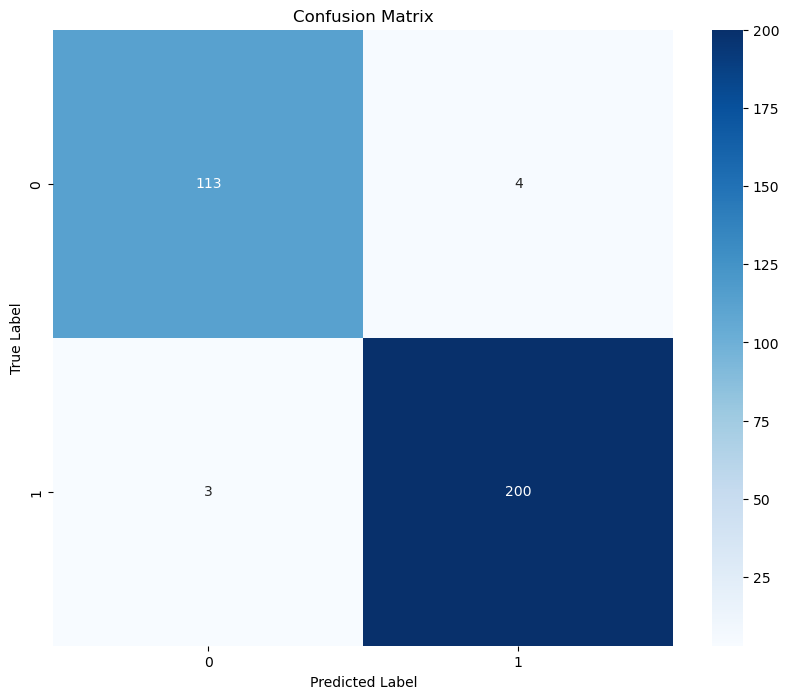

Test Result:
Accuracy Score: 98.75%
_______________________________________________
ROC AUC Score: 99.36%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.970588   1.000000    0.9875   0.985294      0.987868
recall      1.000000   0.978723    0.9875   0.989362      0.987500
f1-score    0.985075   0.989247    0.9875   0.987161      0.987526
support    33.000000  47.000000    0.9875  80.000000     80.000000
_______________________________________________
Confusion Matrix: 
 [[33  0]
 [ 1 46]]



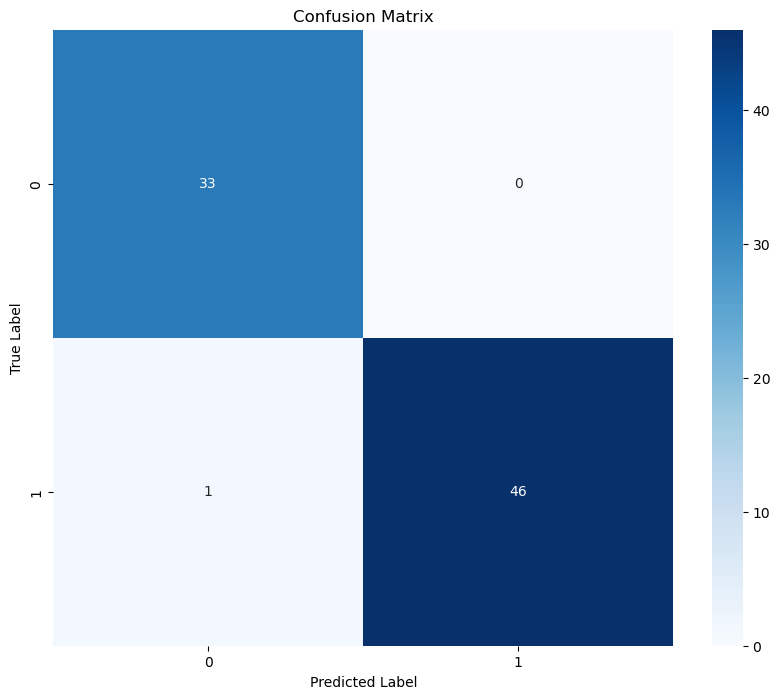

In [247]:
from scipy.stats import loguniform
from sklearn.linear_model import LogisticRegression

param_grid = dict()
param_grid['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
param_grid['penalty'] = ['l2'] #'none', 'l1', 'l2', 'elasticnet'
param_grid['C'] = loguniform.rvs(1e-5, 100, size=10)

grid = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=1, cv=5)
model = grid.fit(X_train, y_train).best_estimator_

best_params = grid.best_params_
print(f"Best params: {best_params}")

y_train_prob = model.predict_proba(X_train)[:, 1]
y_test_prob = model.predict_proba(X_test)[:, 1]

print_score(model, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=True)
lr_acc, lr_ra = print_score(model, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=False)

### KNN

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Best params: {'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
Train Result:
Accuracy Score: 100.00%
_______________________________________________
ROC AUC Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    117.0  203.0       1.0      320.0         320.0
_______________________________________________
Confusion Matrix: 
 [[117   0]
 [  0 203]]



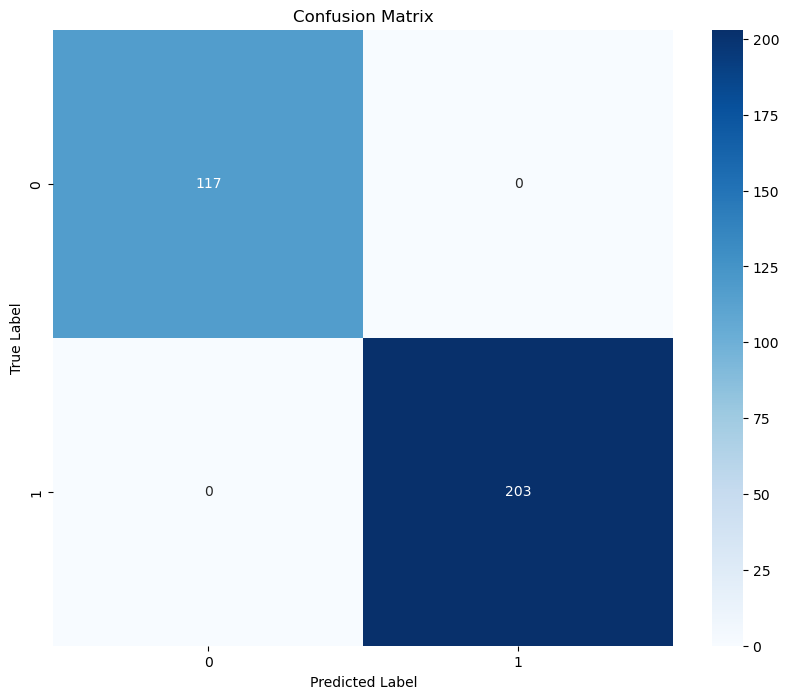

Test Result:
Accuracy Score: 92.50%
_______________________________________________
ROC AUC Score: 93.17%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.864865   0.976744     0.925   0.920805      0.930594
recall      0.969697   0.893617     0.925   0.931657      0.925000
f1-score    0.914286   0.933333     0.925   0.923810      0.925476
support    33.000000  47.000000     0.925  80.000000     80.000000
_______________________________________________
Confusion Matrix: 
 [[32  1]
 [ 5 42]]



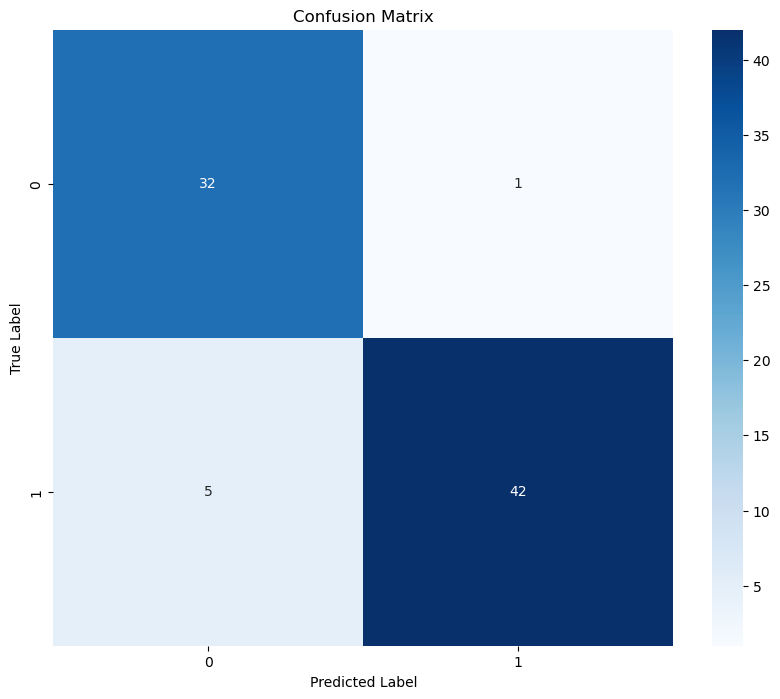

In [249]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {"n_neighbors": [i for i in range(1, 50, 10)],
             "weights": ["uniform", "distance"],
             "algorithm": ["ball_tree", "kd_tree", "brute"],
             "leaf_size": [i for i in range(1, 50, 10)],
             "p": [1,2]}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit=True, verbose=1, cv=5)
model = grid.fit(X_train, y_train).best_estimator_

best_params = grid.best_params_
print(f"Best params: {best_params}")

y_train_prob = model.predict_proba(X_train)[:, 1]
y_test_prob = model.predict_proba(X_test)[:, 1]

print_score(model, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=True)
knn_acc, knn_ra = print_score(model, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=False)

### Decision Tree

Fitting 5 folds for each of 210 candidates, totalling 1050 fits
Best params: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 5}
Train Result:
Accuracy Score: 97.19%
_______________________________________________
ROC AUC Score: 99.73%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.982143    0.966346  0.971875    0.974245      0.972122
recall       0.940171    0.990148  0.971875    0.965159      0.971875
f1-score     0.960699    0.978102  0.971875    0.969400      0.971739
support    117.000000  203.000000  0.971875  320.000000    320.000000
_______________________________________________
Confusion Matrix: 
 [[110   7]
 [  2 201]]



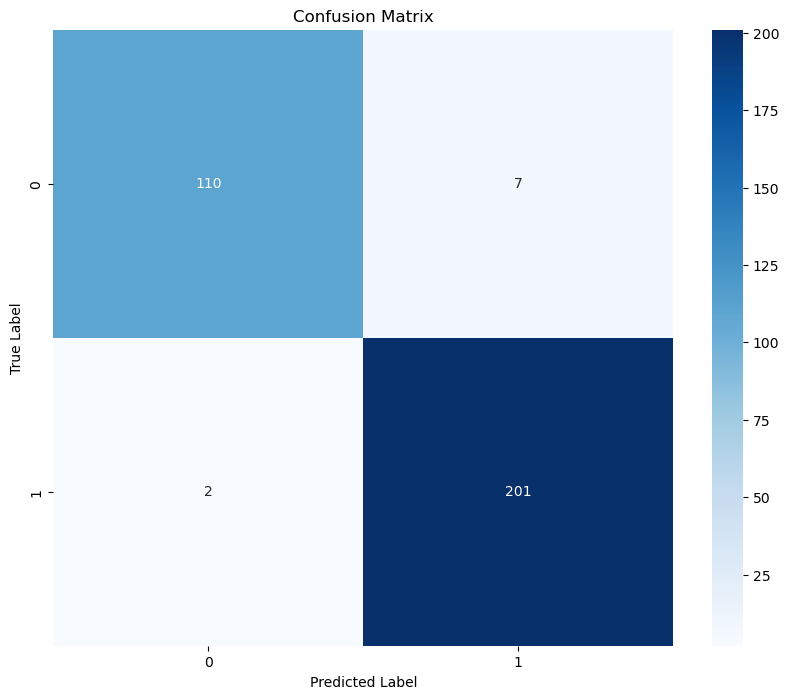

Test Result:
Accuracy Score: 97.50%
_______________________________________________
ROC AUC Score: 98.65%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.942857   1.000000     0.975   0.971429      0.976429
recall      1.000000   0.957447     0.975   0.978723      0.975000
f1-score    0.970588   0.978261     0.975   0.974425      0.975096
support    33.000000  47.000000     0.975  80.000000     80.000000
_______________________________________________
Confusion Matrix: 
 [[33  0]
 [ 2 45]]



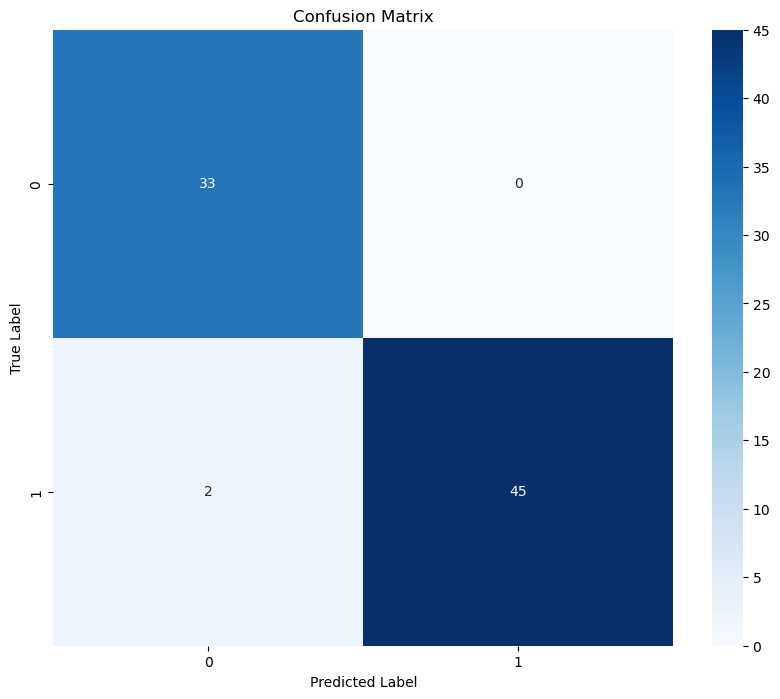

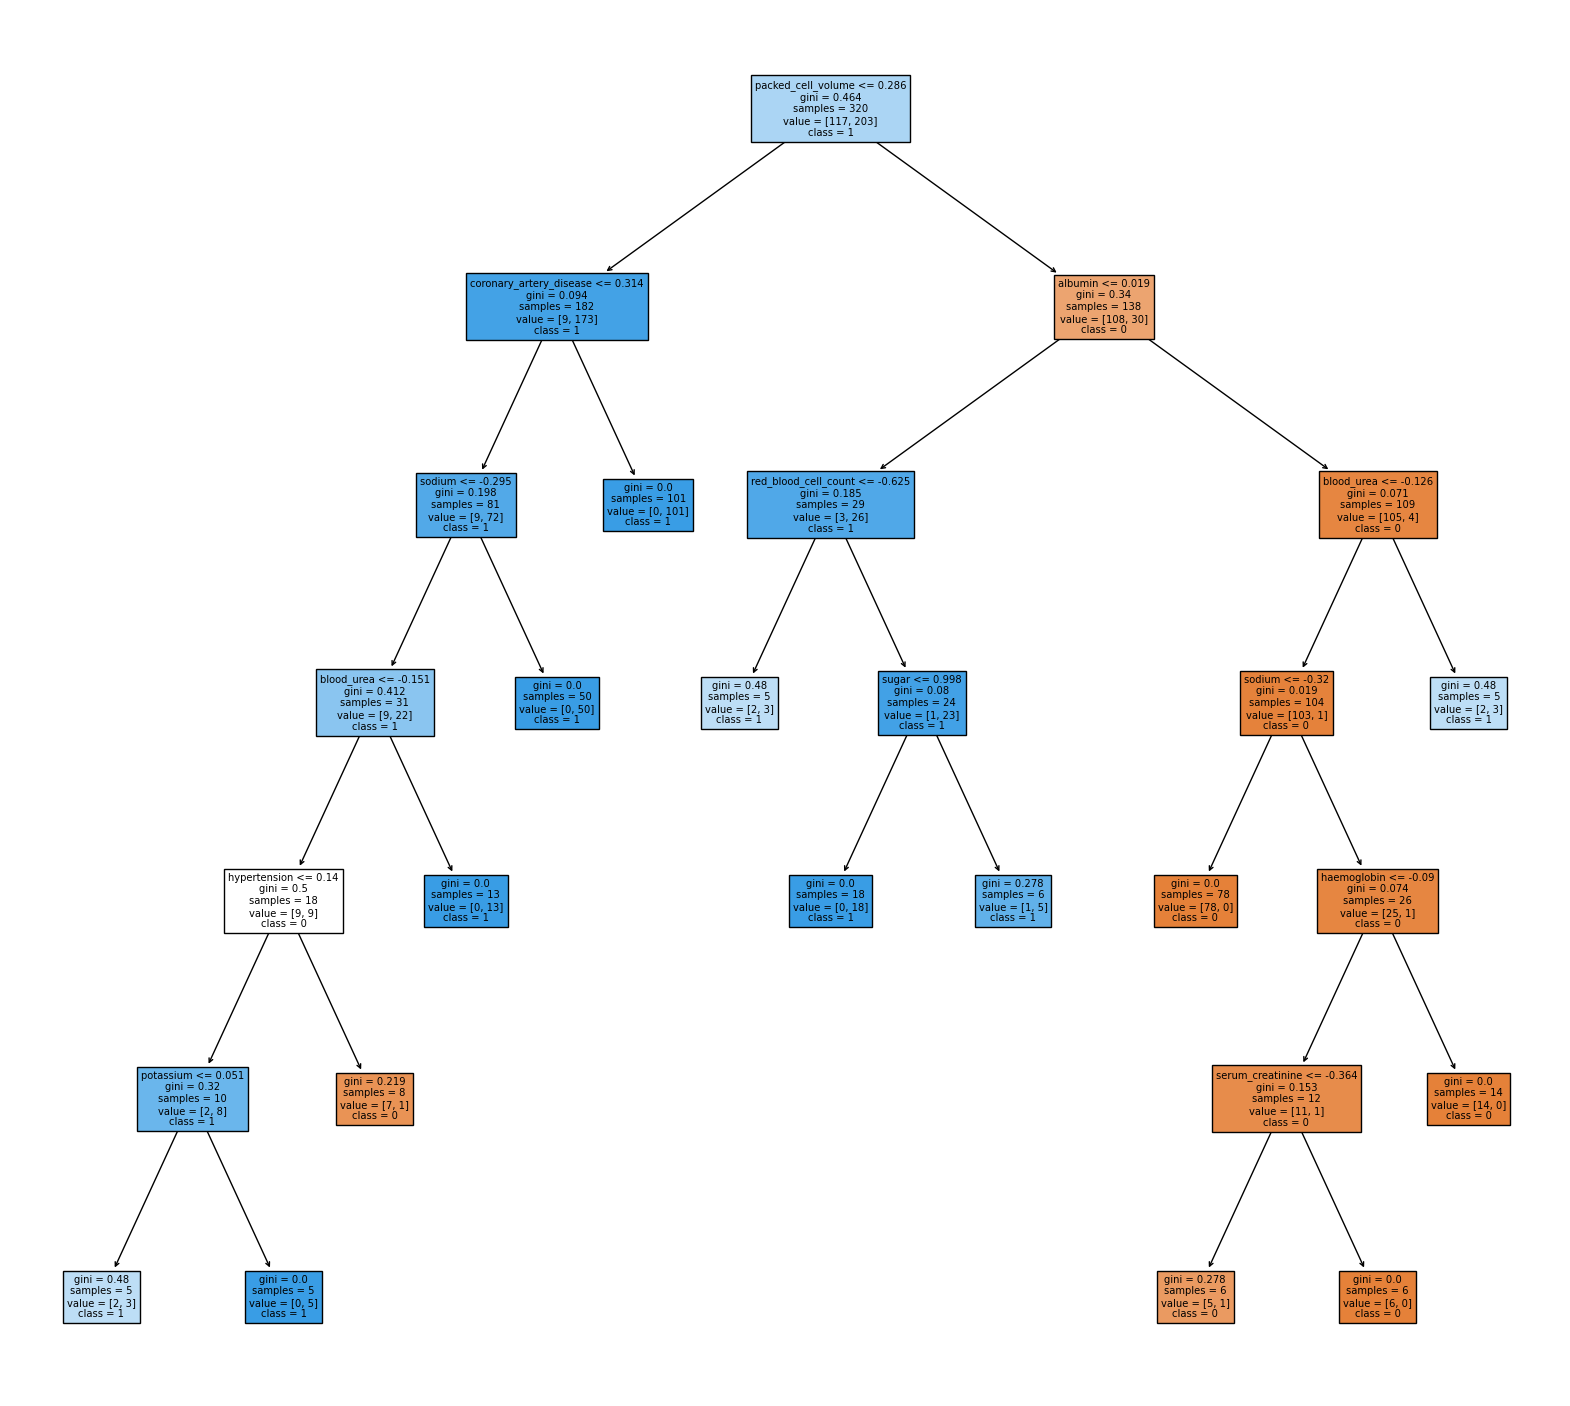

In [252]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

param_grid = {"max_depth": [3, 5, 7, 10, 15, 20, None],
              "max_features": [None, 'sqrt', 'log2'],
              "min_samples_leaf": [1, 3, 5, 10, 20],
              "criterion": ["gini", "entropy"]}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit=True, verbose=1, cv=5)
model = grid.fit(X_train, y_train).best_estimator_

best_params = grid.best_params_
print(f"Best params: {best_params}")

y_train_prob = model.predict_proba(X_train)[:, 1]
y_test_prob = model.predict_proba(X_test)[:, 1]

print_score(model, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=True)
dtc_acc, dtc_ra = print_score(model, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=False)
plt.figure(figsize=(20, 18))
tree.plot_tree(model, feature_names = df.columns.tolist()[1:], filled=True, class_names=["0", "1"])
plt.show()

### Random Forest

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best params: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 50}
Train Result:
Accuracy Score: 98.75%
_______________________________________________
ROC AUC Score: 99.97%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    1.000000    0.980676    0.9875    0.990338      0.987742
recall       0.965812    1.000000    0.9875    0.982906      0.987500
f1-score     0.982609    0.990244    0.9875    0.986426      0.987452
support    117.000000  203.000000    0.9875  320.000000    320.000000
_______________________________________________
Confusion Matrix: 
 [[113   4]
 [  0 203]]



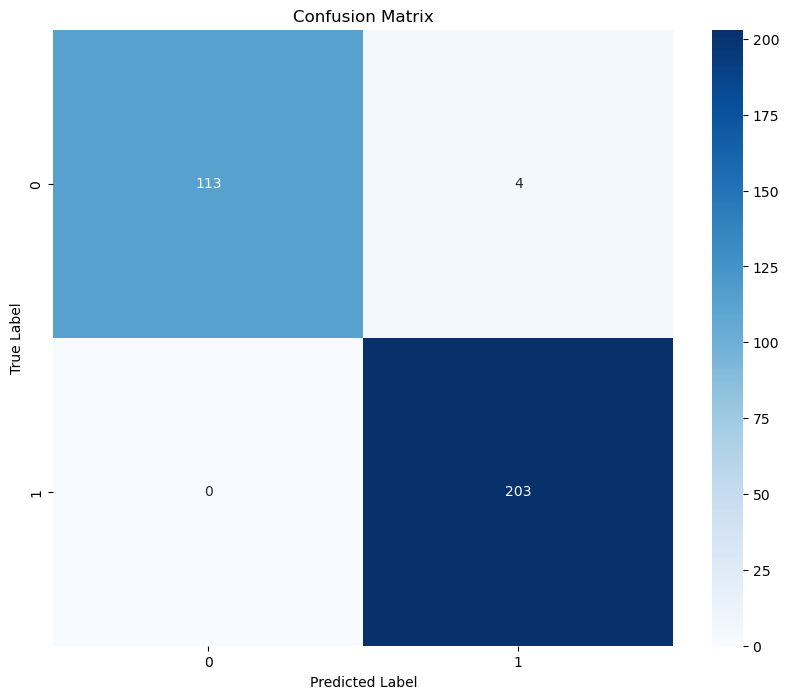

Test Result:
Accuracy Score: 100.00%
_______________________________________________
ROC AUC Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0       1.0        1.0           1.0
support    33.0  47.0       1.0       80.0          80.0
_______________________________________________
Confusion Matrix: 
 [[33  0]
 [ 0 47]]



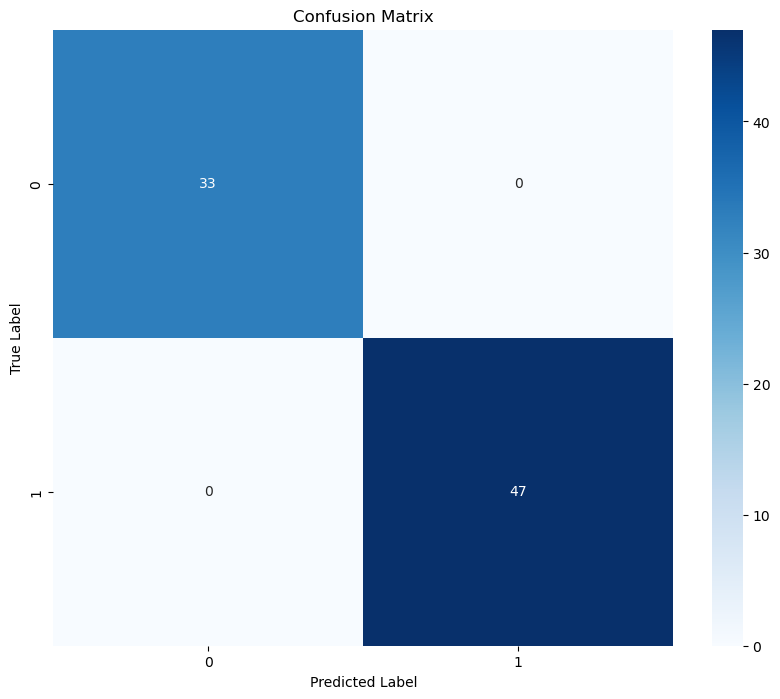

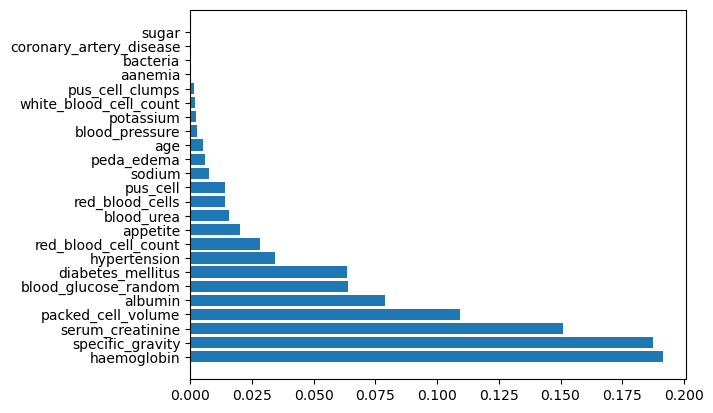

In [256]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'bootstrap': [True, False],
            'max_depth': [None, 5, 10, 15, 20],
            'max_features': [None, 'sqrt'],
            'min_samples_leaf': [1, 10, 20],
            'min_samples_split': [2, 10, 20],
            'n_estimators': [50, 100]}

grid = GridSearchCV(RandomForestClassifier(), param_grid, refit=True, verbose=1, cv=5)
model = grid.fit(X_train, y_train).best_estimator_

best_params = grid.best_params_
print(f"Best params: {best_params}")

y_train_prob = model.predict_proba(X_train)[:, 1]
y_test_prob = model.predict_proba(X_test)[:, 1]

print_score(model, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=True)
rd_clf_acc, rd_clf_ra = print_score(model, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=False)
rfi=pd.Series(model.feature_importances_, index=df.columns.tolist()[:-1]).sort_values(ascending=False)
plt.barh(rfi.index,rfi.values)
plt.show()

In that last graph we can see the features affecting the target the most.

### Models Results and Comparison

In [267]:
# Table Comparison on models
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Accuracy Score' : [lr_acc, knn_acc, dtc_acc, rd_clf_acc],
    'ROC/AUC Score' : [lr_ra, knn_ra, dtc_ra, rd_clf_ra]})
    
models.sort_values(by = 'Accuracy Score', ascending = False)

,Model,Accuracy Score,ROC/AUC Score
3,Random Forest Classifier,100.00,100.000000
0,Logistic Regression,98.75,99.355255
2,Decision Tree Classifier,97.50,98.646035
1,KNN,92.50,93.165700


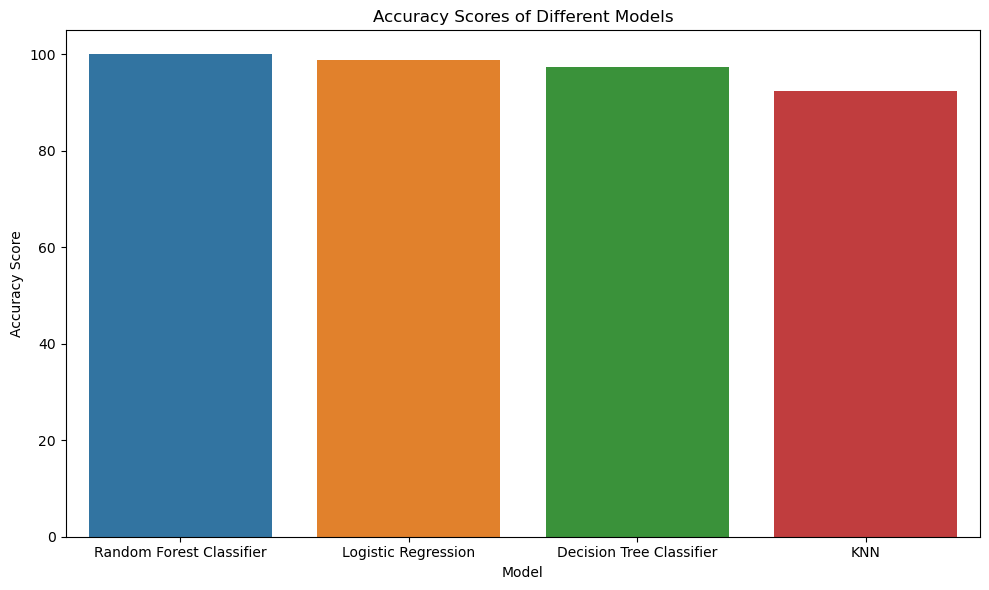

In [268]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=models.sort_values(by = 'Accuracy Score', ascending = False), x='Model', y='Accuracy Score')
plt.title('Accuracy Scores of Different Models')
plt.ylabel('Accuracy Score')
plt.tight_layout()
plt.show()

We can now choose the best model according to our results.

## Unsupervised Learning

### Splitting and Scaling the Data

In [100]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = df.drop("class", axis=1)
y = df["class"]

print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")

pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())])

X = pipeline.fit_transform(X)

'X' shape: (400, 24)
'y' shape: (400,)


### TSNE

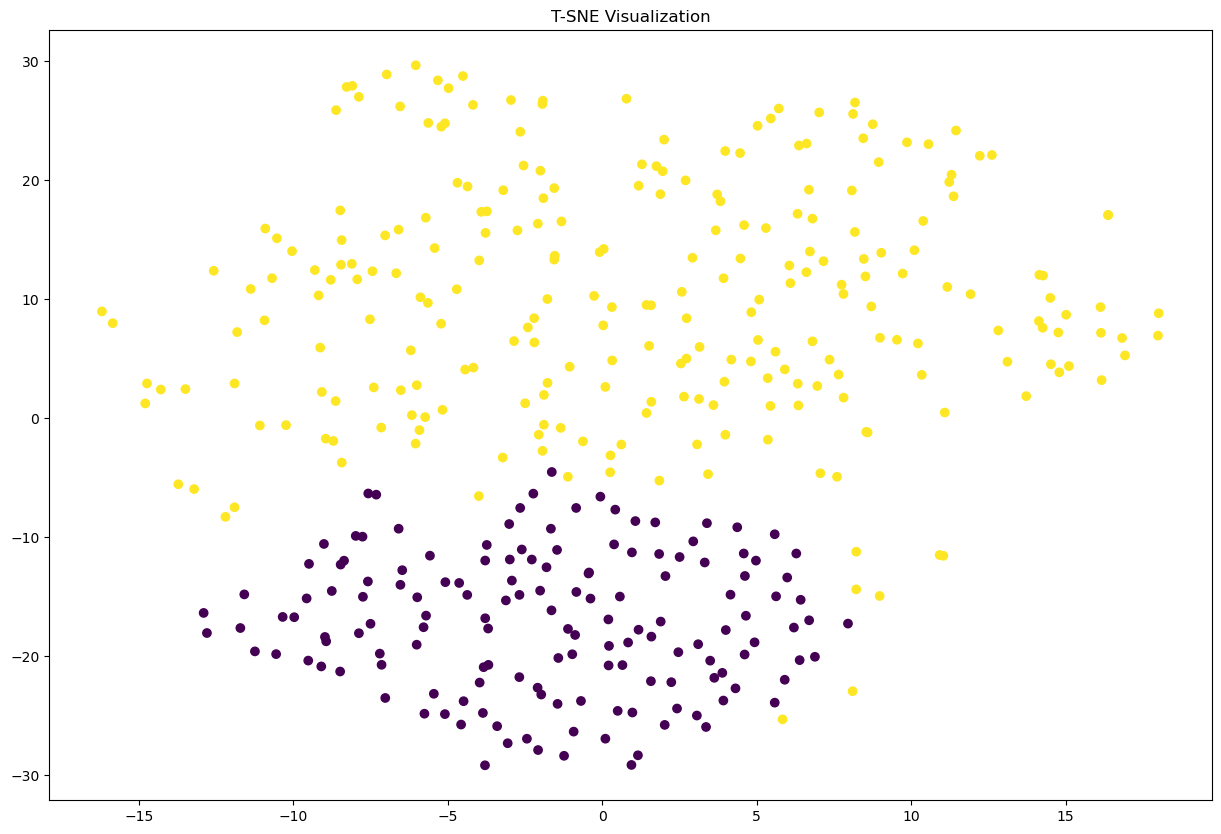

In [101]:
from sklearn.manifold import TSNE

# Let's check how well is the data seperated
tsne_model = TSNE()
tsne_data= tsne_model.fit_transform(X)
xs=tsne_data[:,0]
ys=tsne_data[:,1]
plt.figure(figsize=(15,10))
plt.scatter(xs,ys,c=y)
plt.title("T-SNE Visualization")
plt.show()

### PCA

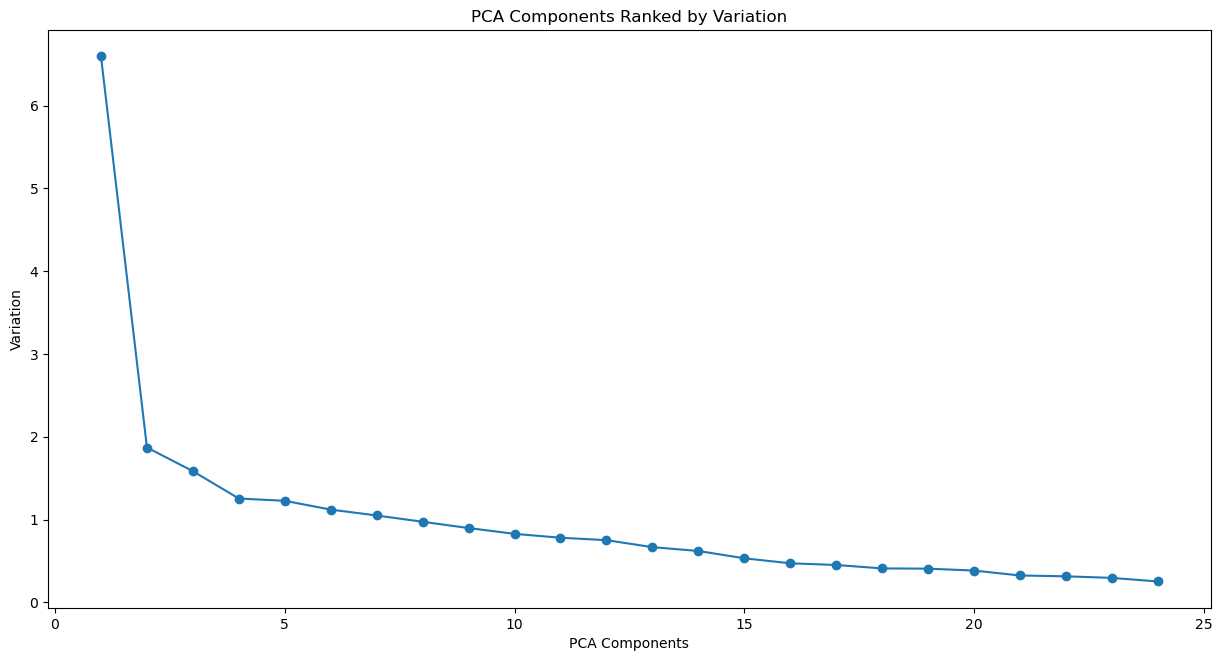

In [102]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

# Plotting
pca_features=list(range(1,25))
ax=plt.figure(figsize=(15,7.5))
plt.plot(pca_features, pca.explained_variance_, marker = 'o')
plt.ylabel('Variation')
plt.xlabel('PCA Components')
plt.title("PCA Components Ranked by Variation")
plt.show()

Sticking to 1 as higher explained variance indicates better retention of information in the reduced dimensions.

In [104]:
# Appling PCA on the data
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

### K-Means

In [118]:
from sklearn.cluster import KMeans
# Find the optimal k value using the Elbow method
inertia_values = []
k_values = range(1, 30)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_pca)
    inertia_values.append(kmeans.inertia_)

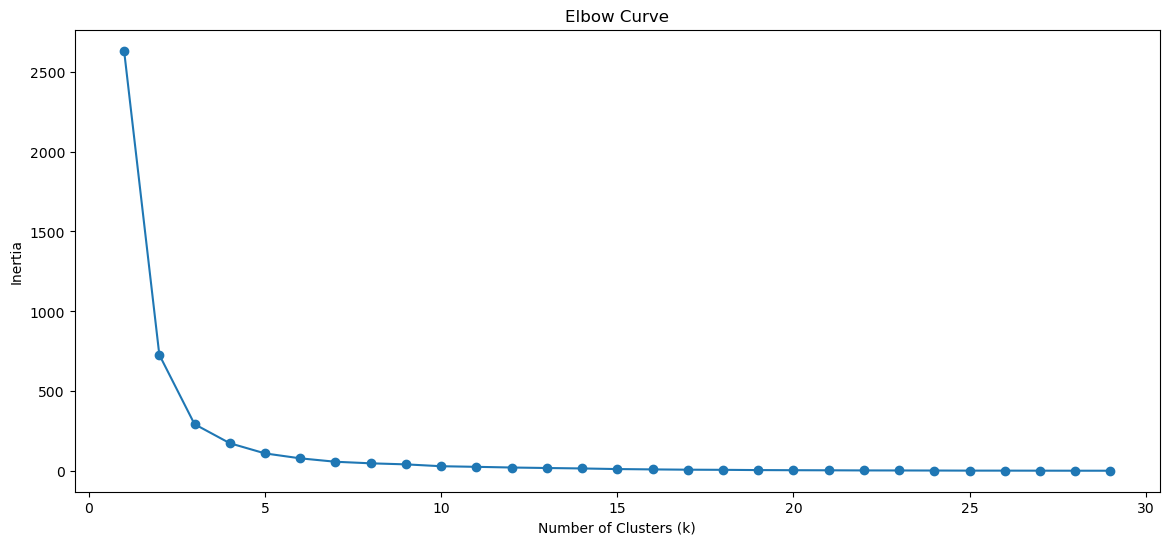

In [119]:
# Plot the Elbow method graph
plt.figure(figsize=(14, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

The elbow seems to be at k = 3 to 6 clusters

In [120]:
from sklearn.metrics import silhouette_score

# Find the optimal k value using the silhouette method
k_values = range(2, 30)
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    silhouette_scores.append(score)

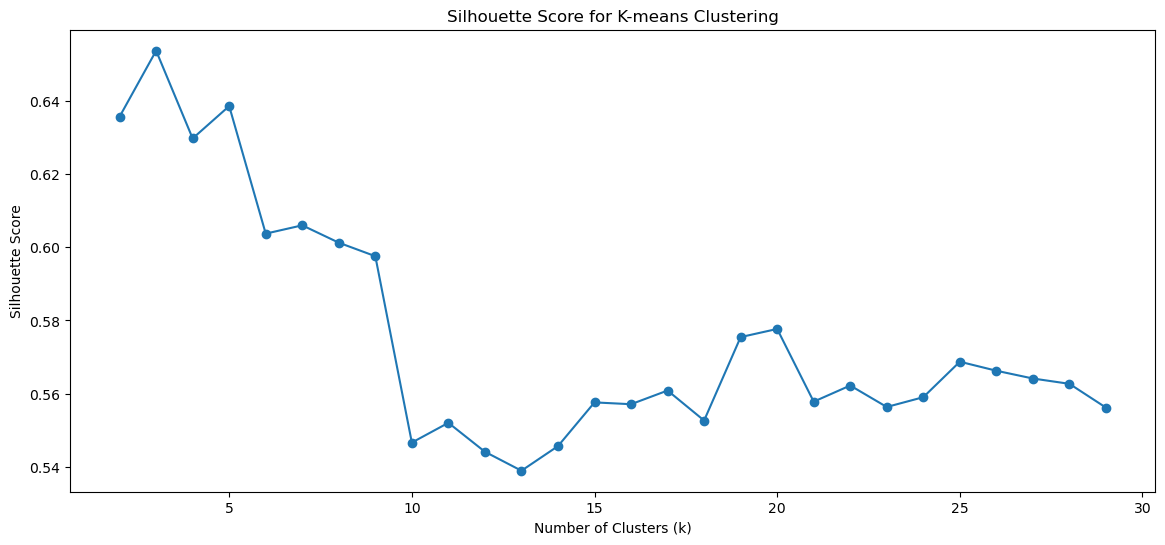

In [121]:
# Plot the silhouette scores
plt.figure(figsize=(14, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-means Clustering')
plt.show()

Highest value is at 3 clusters.

### Evaluating

#### PCA with 1 component and K = 3

In [141]:
# Evaluating on optimal k with PCA
# 1. Fit K-means on Training Data
k = 5  # Replace with the optimal k value you determined
kmeans = KMeans(n_clusters=k, random_state=42, n_init = 'auto')
kmeans.fit(X_pca)

# 2. Predict Clusters on Test Data
cluster_labels = kmeans.predict(X_pca)

# 3. Evaluate Clustering Performance (using silhouette score)
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print(f"Silhouette Score on Test Data: {silhouette_avg}")

Silhouette Score on Test Data: 0.6385930089816888


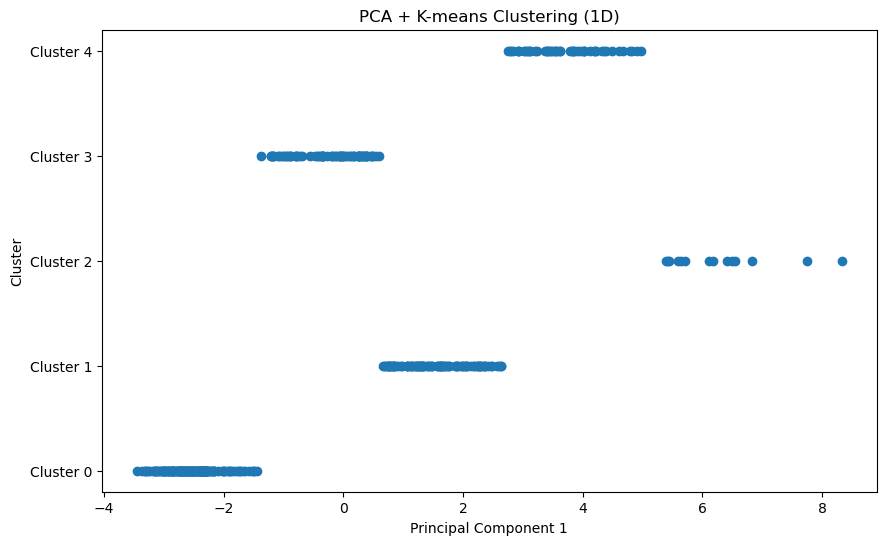

In [142]:
# Visualize Clusters using a line plot
plt.figure(figsize=(10, 6))
plt.plot(X_pca, cluster_labels, 'o')
plt.xlabel('Principal Component 1')
plt.ylabel('Cluster')
plt.title('PCA + K-means Clustering (1D)')
plt.yticks(range(k), labels=['Cluster {}'.format(i) for i in range(k)])
plt.show()

The data was successfully seperated into 3 different clusters

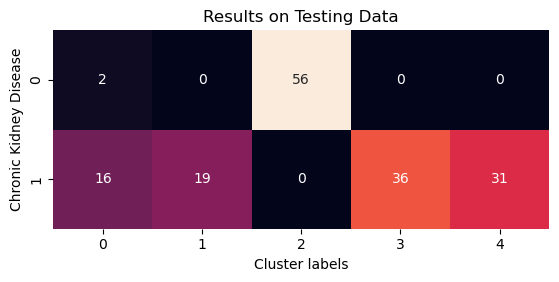

In [140]:
# Plotting the results against our target variable
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.4, random_state=42)

pca_training_data=pca.fit_transform(X_train)
model=KMeans(n_clusters=5, n_init = 'auto', random_state=5)
model.fit(pca_training_data)
pca_testing_data=pca.transform(X_test)
cluster_labels=model.predict(pca_testing_data)

sns.heatmap(pd.crosstab(Y_test,cluster_labels), square='True', cbar=False, annot=True, fmt='d')
plt.title("Results on Testing Data")
plt.ylabel("Chronic Kidney Disease")
plt.xlabel("Cluster labels")
plt.show()

As we can see here when using 5 clusters and PCA = 1, we only get 2 missclassifications in the test data.

**Testing Accuracy = 158/160 = 98.75%**

### Hierarchical Clustering

Finding best parameters using a search algorithm

In [196]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import pairwise_distances
from itertools import product

# Define linkage criteria and distance metrics to test
linkage_criteria = ['ward', 'complete', 'average']
distance_metrics = ['euclidean', 'manhattan']
n_clusters_values = [i for i in range(2, 10)]

best_score = -1
best_params = {}

# Grid search over different combinations of linkage and distance
for linkage, distance, n_clusters in product(linkage_criteria, distance_metrics, n_clusters_values):
    if linkage == 'ward' and distance == 'manhattan':
        continue  # Skip incompatible combination
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, metric=distance)
    labels = clustering.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    
    print(f"n_clusters: {n_clusters}, Linkage: {linkage}, Distance: {distance}, Silhouette Score: {score}")
    
    if score > best_score:
        best_score = score
        best_params = {'n_clusters': n_clusters, 'linkage': linkage, 'distance': distance}

print("Best Parameters:", best_params)
print("Best Score:", best_score)

n_clusters: 2, Linkage: ward, Distance: euclidean, Silhouette Score: 0.640167059513334
n_clusters: 3, Linkage: ward, Distance: euclidean, Silhouette Score: 0.5945132017887237
n_clusters: 4, Linkage: ward, Distance: euclidean, Silhouette Score: 0.6101472129352208
n_clusters: 5, Linkage: ward, Distance: euclidean, Silhouette Score: 0.5622482374848476
n_clusters: 6, Linkage: ward, Distance: euclidean, Silhouette Score: 0.5501850722683465
n_clusters: 7, Linkage: ward, Distance: euclidean, Silhouette Score: 0.5526247123418631
n_clusters: 8, Linkage: ward, Distance: euclidean, Silhouette Score: 0.5450846912917722
n_clusters: 9, Linkage: ward, Distance: euclidean, Silhouette Score: 0.5486773391483757
n_clusters: 2, Linkage: complete, Distance: euclidean, Silhouette Score: 0.5163786580173185
n_clusters: 3, Linkage: complete, Distance: euclidean, Silhouette Score: 0.6446638553833144
n_clusters: 4, Linkage: complete, Distance: euclidean, Silhouette Score: 0.6213177107437607
n_clusters: 5, Linkag

Best Parameters: {'n_clusters': 3, 'linkage': 'average', 'distance': 'euclidean'}

### Evaluating

Dendogram

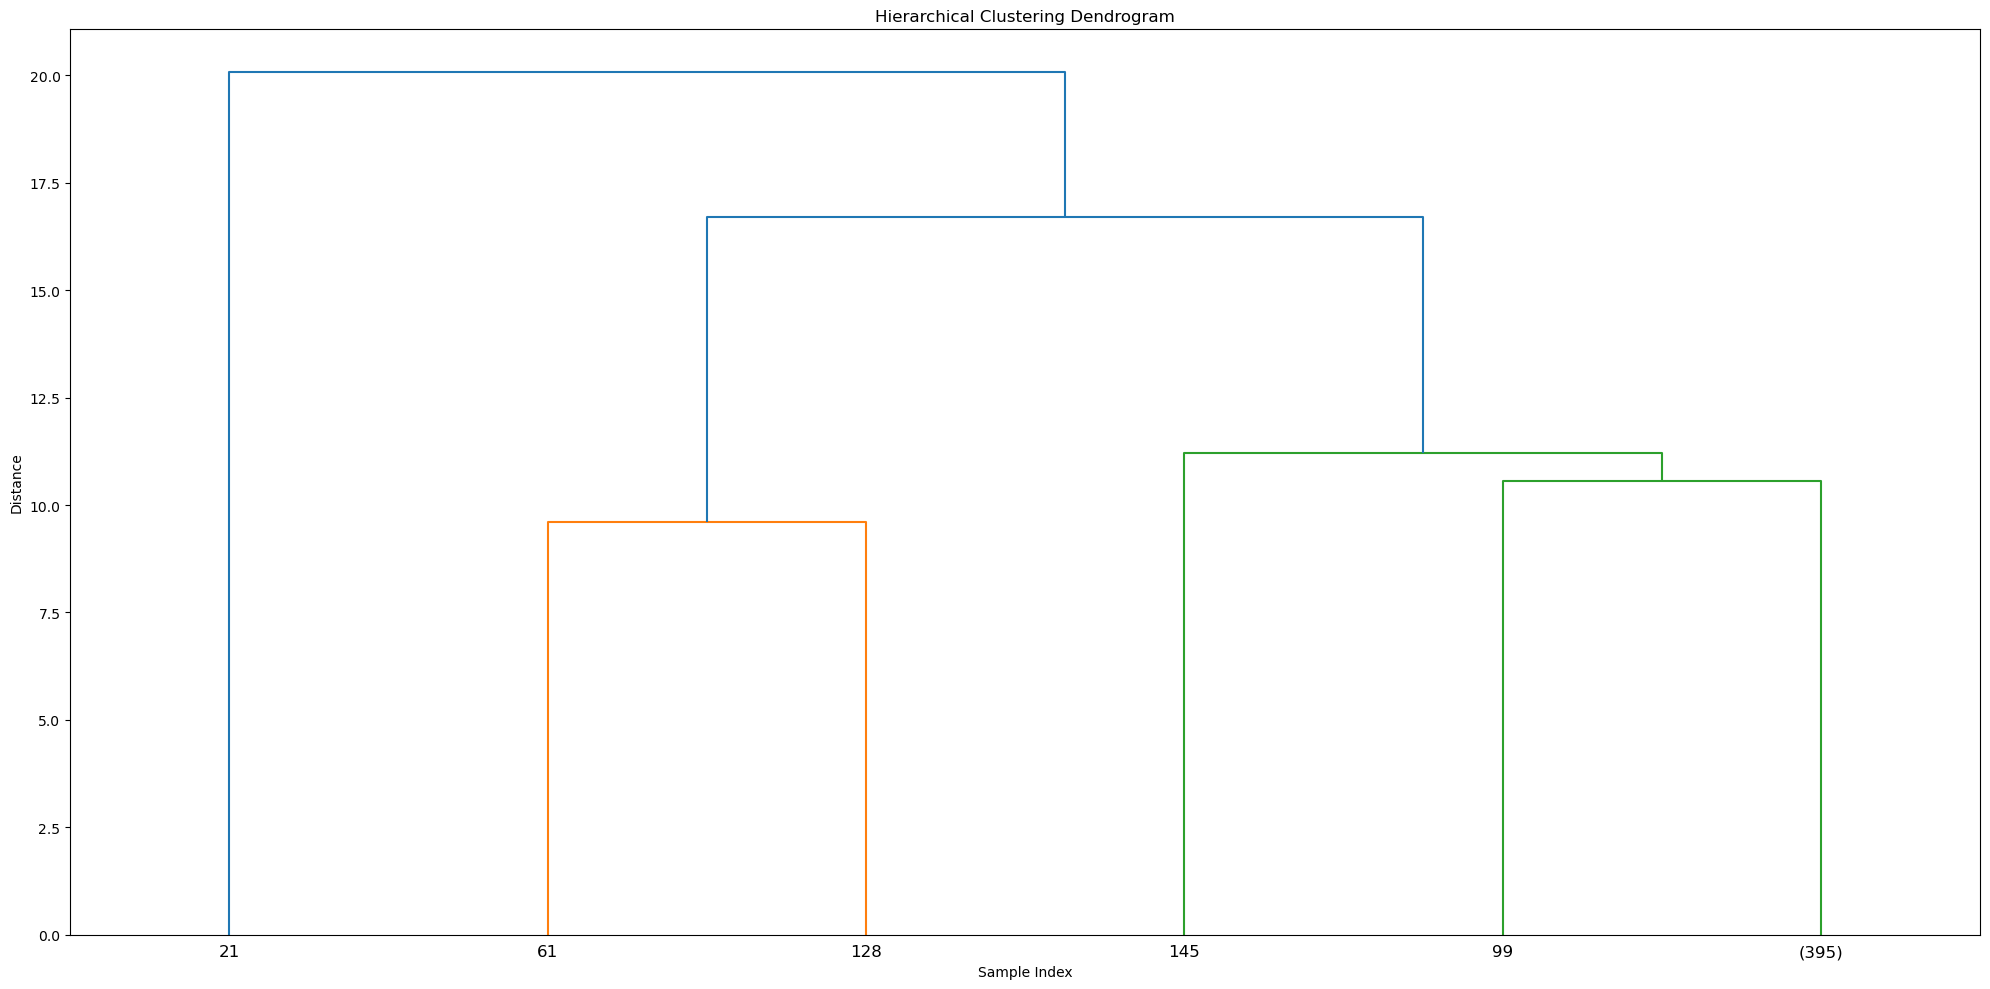

In [181]:
from scipy.cluster.hierarchy import linkage, dendrogram
# Plot Dendrogram
plt.figure(figsize=(20, 10))
dendrogram(linkage(X, method=best_params['linkage'], metric=best_params['distance']), p = 3, truncate_mode='level')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

Only the blue lines.

Clustering

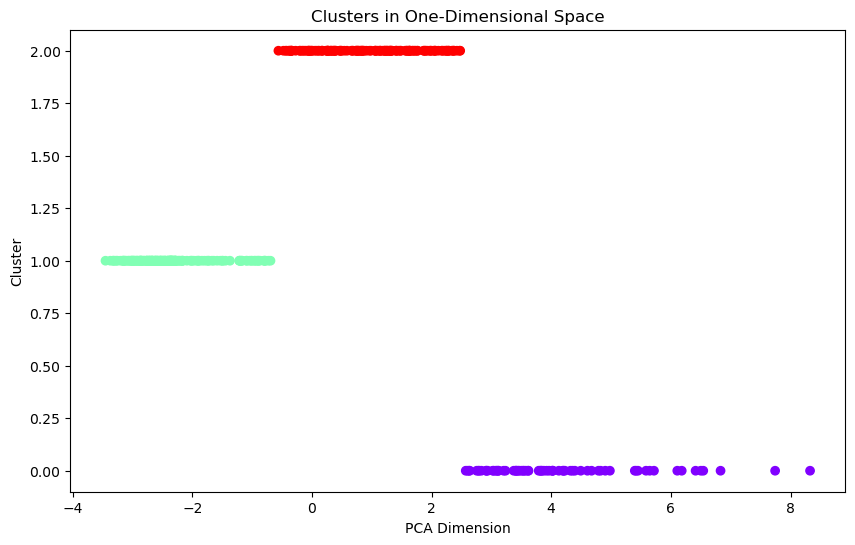

In [197]:
clustering = AgglomerativeClustering(n_clusters=best_params['n_clusters'], linkage=best_params['linkage'], metric=best_params['distance'])
labels = clustering.fit_predict(X_pca)

# Plot data points along the single dimension with cluster colors
plt.figure(figsize=(10, 6))
plt.scatter(X_pca, labels, c=labels, cmap='rainbow', marker='o')
plt.xlabel('PCA Dimension')
plt.ylabel('Cluster')
plt.title('Clusters in One-Dimensional Space')
plt.show()

The data was successfully seperated into 5 different clusters.

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
# Plot Dendrogram for 3 clusters
plt.figure(figsize=(20, 10))
dendrogram(linkage(X, method=best_params['linkage'], metric=best_params['distance']), p = 3, truncate_mode='lastp')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

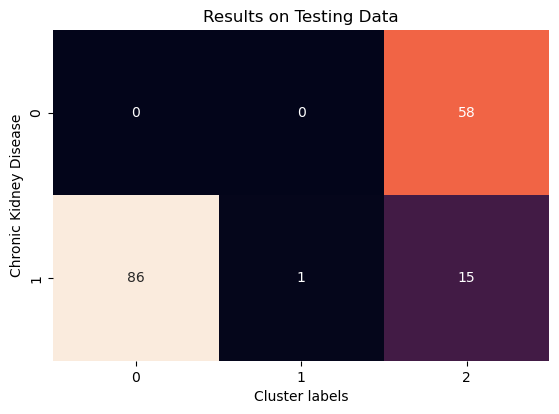

In [204]:
# Plotting the results against our target variable
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.4, random_state=42)

pca_training_data=pca.fit_transform(X_train)
model = AgglomerativeClustering(n_clusters=best_params['n_clusters'], linkage=best_params['linkage'], metric=best_params['distance'])
model.fit(pca_training_data)
pca_testing_data=pca.transform(X_test)
cluster_labels=model.fit_predict(pca_testing_data)

sns.heatmap(pd.crosstab(Y_test,cluster_labels), square='True', cbar=False, annot=True, fmt='d')
plt.title("Results on Testing Data")
plt.ylabel("Chronic Kidney Disease")
plt.xlabel("Cluster labels")
plt.show()

As we can see here when using the best parameters from the search, we get 15 missclassifications in the test data.

**Testing Accuracy = 145/160 = 90.625%**

### Models Results and Comparison

In our two models of unsupervised learning (Hierarchical Clustering and K-Means), we can see that K-Means gave us much better results.